### 데이터 프레임 만들기

In [2]:
import pandas as pd

In [41]:
data = {
    "도시" : ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도" : ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구" : [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역" : ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도","인구","지역"]
df1 = pd.DataFrame(data, columns = columns)

In [42]:
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


### 피봇테이블

In [5]:
df1.pivot("도시", "연도", "인구") # 행 인덱스, 열 인덱스, 데이터 이름 

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [6]:
df1.set_index(["도시", "연도"])[["인구"]].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

In [7]:
df1.pivot(["지역","도시"], "연도","인구") # 다중 인덱스 

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

행 인덱스와 열 인덱스는 데이터를 찾는 키(key)역할을 한다. 따라서 키 값으로 데이터가 단 하나만 찾아져야 한다. 만약 행 인덱스와 열 인덱스 조건을 만족하는 데이터가 2개 이상인 경우에는 에러가 발생한다.


예를 들어 위 데이터프레임에서 ("지역", "연도")를 키로 하면, ("수도권", "2015")에 해당하는 값이 두 개 이상이므로 다음과 같이 에러가 발생한다. 

In [8]:
try: 
    df1.pivot("지역", "연도", "도시")
except ValueError as e:
    print("ValueError:", e)

ValueError: Index contains duplicate entries, cannot reshape


### 그룹분석
- 피봇 테이블과 달리 키에 의해서 결정되는 데이터가 여러개가 있을 경우, 미리 지정한 연산을 통해 그 그룹 데이터의 대푯값을 계산한다. 

- 판다스에서는 groupby 메서드를 사용하여 다음처럼 그룹분석을 한다. 


1) 분석하고자 하는 시리즈나 데이터프레임에 groupby 메서드를 호출하여 그룹화를 한다. 


2) 그룹 객체에 대해 그룹연산을 수행한다

groupby 메서드
- groupby 메서드는 데이터를 그룹 별로 분류하는 역할을 한다. groupby 메서드의 인수로는 다음과 같은 값을 사용한다
- 열 또는 열의 리스트
- 행 인덱스

그룹 연산 메서드
- size, count : 그룹 데이터의 갯수
- mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대
- sum, prod, std, var, quantile: 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수
- first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터 

In [11]:
import numpy as np

In [12]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [13]:
groups = df2.groupby(df2.key1)
groups

In [14]:
groups.groups

{'A': [0, 1, 4], 'B': [2, 3]}

In [15]:
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [16]:
df2.data1.groupby(df2.key1).sum()

key1
A    8
B    7
Name: data1, dtype: int64

In [17]:
df2.groupby(df2.key1)['data1'].sum() # `GroupBy` 클래스 객체에서 data1만 선택하여 분석하는 경우

key1
A    8
B    7
Name: data1, dtype: int64

In [18]:
df2.groupby(df2.key1).sum()['data1'] # 전체 데이터를 분석한 후 data1만 선택한 경우

key1
A    8
B    7
Name: data1, dtype: int64

연습문제

key1의 값을 기준으로 data1의 값을 분류하여 합계를 구한 결과를 시리즈가 아닌 데이터프레임으로 구한다.

In [20]:
pd.DataFrame(df2.groupby(df2.key1).sum()['data1'])

,data1
key1,
A,8
B,7


In [23]:
df2.data1.groupby([df2.key1, df2.key2]).sum() # 분석하고자 하는 키가 복수이면 리스트 사용

key1  key2
A     one     6
      two     2
B     one     3
      two     4
Name: data1, dtype: int64

In [26]:
df2.data1.groupby([df2.key1, df2.key2]).sum().unstack("key2") # 피봇 테이블 형태로

key2,one,two
key1,,
A,6,2
B,3,4


인구데이터로부터 지역별 합계

In [29]:
df1.인구.groupby(df1.지역).sum()

지역
경상권    10354475
수도권    32451994
Name: 인구, dtype: int64

In [33]:
df1['인구'].groupby([df1['지역'], df1['연도']]).sum().unstack("연도")

연도,2005,2010,2015
지역,,,
경상권,3512547,3393191,3448737
수도권,9762546,9894685,12794763


In [2]:
import seaborn as sns

In [3]:
iris = sns.load_dataset("iris")

각 붓꽃 종별로 가장 큰 값과 가장 작은 값의 비율을 구해보자. 이러한 계산을 하는 그룹연산 메서드는 없으므로 직접 만든 후 agg 메서드를 적용한다

In [36]:
def peak_to_peak_ratio(x):
    return x.max() / x.min()

In [37]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [38]:
iris.groupby(iris['species']).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [6]:
iris.groupby(iris.species).describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [7]:
def top3_petal_length(df):
    return df.sort_values(by="petal_length", ascending = False)[:3]

In [8]:
iris.groupby(iris.species).apply(top3_petal_length)

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

In [11]:
import pandas as pd

transform 메서드는 그룹별 대표값을 만드는 것이 아니라 그룹별 계산을 통해 데이터프레임 자체를 변화시킨다. 따라서 만들어진 데이터프레임의 크기는 원래 데이터프레임과 같다. 예를 들어 다음처럼 각 붓꽃 꽃잎길이가 해당 종 내에서 대/중/소 어느 것에 해당되는지에 대한 데이터프레임을 만들 수도 있다.

- 대푯값이 아닌 라벨을 붙인 데이터프레임을 아웃풋

In [12]:
def q3cut(s):
    return pd.qcut(s, 3, labels=['소','중','대']).astype(str)

iris["petal_length_class"] = iris.groupby(iris.species).petal_length.transform(q3cut)
iris[['petal_length', 'petal_length_class']].tail(10)

,petal_length,petal_length_class
140,5.6,중
141,5.1,소
142,5.1,소
143,5.9,대
144,5.7,중
145,5.2,소
146,5.0,소
147,5.2,소
148,5.4,중
149,5.1,소


붓꽃(iris) 데이터에서 붓꽃 종(species)별로 꽃잎길이(sepal_length), 꽃잎폭(sepal_width) 등의 평균을 구하라. 만약 붓꽃 종(species)이 표시되지 않았을 때 이 수치들을 이용하여 붓꽃 종을 찾아낼 수 있을지 생각하라.

In [31]:
iris.groupby(iris.species).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [38]:
iris.groupby(iris.species).mean()['sepal_length']

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

pivot_table

Pandas는 pivot 명령과 groupby 명령의 중간 성격을 가지는 pivot_table 명령도 제공한다.

pivot_table 명령은 groupby 명령처럼 그룹분석을 하지만 최종적으로는 pivot 명령처럼 피봇테이블을 만든다. 즉 groupby 명령의 결과에 unstack을 자동 적용하여 2차원적인 형태로 변형한다. 사용 방법은 다음과 같다.

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, margins_name='All')

data: 분석할 데이터프레임 (메서드일 때는 필요하지 않음)

values: 분석할 데이터프레임에서 분석할 열

index: 행 인덱스로 들어갈 키 열 또는 키 열의 리스트

columns: 열 인덱스로 들어갈 키 열 또는 키 열의 리스트

aggfunc: 분석 메서드

fill_value: NaN 대체 값

margins: 모든 데이터를 분석한 결과를 오른쪽과 아래에 붙일지 여부

margins_name: 마진 열(행)의 이름

In [44]:
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [45]:
# 데이터 프레임에서 분석할 열, 행 인덱스로 들어갈 열, 열 인덱스로 들어갈 키 열
df1.pivot_table("인구","도시","연도") 

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [47]:
# margin=True 인수를 주면 aggfunc로 주어진 분석 방법을 해당 열의 모든 데이터, 해당 행의 모든 데이터 그리고 전체 데이터에 대해 적용한 결과를 같이 보여준다
# aggfunc이 주어지지 않았으면 평균을 계산한다
df1.pivot_table("인구","도시","연도", margins=True, margins_name="합계")

연도,2005,2010,2015,합계
도시,,,,
부산,3512547.0,3393191.0,3448737.0,3.451492e+06
서울,9762546.0,9631482.0,9904312.0,9.766113e+06
인천,NaN,263203.0,2890451.0,1.576827e+06
합계,6637546.5,4429292.0,5414500.0,5.350809e+06


In [49]:
df1['인구'].mean()

5350808.625

In [50]:
# 다중 인덱스 테이블 
df1.pivot_table("인구", index=["연도","도시"]) # index : 행 

인구
연도   도시         
2005 부산  3512547
     서울  9762546
2010 부산  3393191
     서울  9631482
     인천   263203
2015 부산  3448737
     서울  9904312
     인천  2890451

In [52]:
df1.pivot_table("인구", columns=['연도', '도시'])

연도     2005              2010                      2015                  
도시       부산       서울       부산       서울      인천       부산       서울       인천
인구  3512547  9762546  3393191  9631482  263203  3448737  9904312  2890451

In [54]:
# total_bill : 식사대금 
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


식사 대금 대비 팁의 비율이 어떤 경우에 가장 높아지지는 찾는 것이다. 우선 식사대금와 팁의 비율을 나타내는 tip_pct를 추가하자.

In [55]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [57]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


In [58]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


우선 성별로 나누어 데이터 갯수를 세어본다.

In [61]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size,tip_pct
sex,,,,,,,
Male,157,157,157,157,157,157,157
Female,87,87,87,87,87,87,87


데이터 갯수의 경우 NaN 데이터가 없다면 모두 같은 값이 나올 것이다. 이 때는 size 명령을 사용하면 더 간단히 표시된다. size 명령은 NaN이 있어도 상관하지 않는다.

In [62]:
tips.groupby('sex').size()

sex
Male      157
Female     87
dtype: int64

이번에는 성별과 흡연유무로 나누어 데이터의 갯수를 알아본다.

In [64]:
tips.groupby(['sex','smoker']).size()

sex     smoker
Male    Yes       60
        No        97
Female  Yes       33
        No        54
dtype: int64

좀 더 보기 좋도록 피봇 데이블 형태로 바꿀 수도 있다.

In [66]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')

pivot_table의 aggfunc으로 size 설정 불가능. count만 가능

In [68]:
# 행 인덱스, 열 인덱스, 전체/행/열별 분석 결과 (margins=True)
tips.pivot_table('tip_pct','sex','smoker',aggfunc='count', margins=True)

smoker,Yes,No,All
sex,,,
Male,60,97,157
Female,33,54,87
All,93,151,244


이제 성별과 흡연 여부에 따른 평균 팁 비율을 살펴본다.

In [69]:
tips.groupby('sex')[['tip_pct']].mean()

,tip_pct
sex,
Male,0.157651
Female,0.166491


In [70]:
tips.groupby('smoker')[['tip_pct']].mean()

,tip_pct
smoker,
Yes,0.163196
No,0.159328


In [72]:
# 데이터, 행 인덱스, 열 인덱스, aggfunc,margins
tips.pivot_table('tip_pct','sex', 'smoker', aggfunc='mean', margins=True)

smoker,Yes,No,All
sex,,,
Male,0.152771,0.160669,0.157651
Female,0.182150,0.156921,0.166491
All,0.163196,0.159328,0.160803


In [73]:
# 데이터, 행 인덱스, 열 인덱스, aggfunc,margins
tips.pivot_table('tip_pct','sex', 'smoker', aggfunc='mean')

smoker,Yes,No
sex,,
Male,0.152771,0.160669
Female,0.182150,0.156921


In [74]:
tips.pivot_table("tip_pct", "sex")

,tip_pct
sex,
Male,0.157651
Female,0.166491


In [76]:
tips.pivot_table("tip_pct", "smoker")

,tip_pct
smoker,
Yes,0.163196
No,0.159328


In [77]:
# 데이터, 행 인덱스, 열 인덱스, aggfunc, margins, margins_name
tips.pivot_table("tip_pct", ["sex", "smoker"])

tip_pct
sex    smoker          
Male   Yes     0.152771
       No      0.160669
Female Yes     0.182150
       No      0.156921

여성 혹은 흡연자의 팁 비율이 높은 것을 볼 수 있다. 하지만 이 데이터에는 평균을 제외한 분산(variance) 등의 다른 통계값이 없으므로 describe 명령으로 여러가지 통계값을 한 번에 알아본다.

In [79]:
tips.groupby("sex")[['tip_pct']].describe()

tip_pct                                                              \
         count      mean       std       min       25%       50%       75%   
sex                                                                          
Male     157.0  0.157651  0.064778  0.035638  0.121389  0.153492  0.186240   
Female    87.0  0.166491  0.053632  0.056433  0.140416  0.155581  0.194266   

                  
             max  
sex               
Male    0.710345  
Female  0.416667

In [81]:
tips.groupby("smoker")[['tip_pct']].describe()

tip_pct                                                              \
         count      mean       std       min       25%       50%       75%   
smoker                                                                       
Yes       93.0  0.163196  0.085119  0.035638  0.106771  0.153846  0.195059   
No       151.0  0.159328  0.039910  0.056797  0.136906  0.155625  0.185014   

                  
             max  
smoker            
Yes     0.710345  
No      0.291990

In [82]:
tips.groupby(['sex','smoker'])['tip_pct'].describe()

count      mean       std       min       25%       50%  \
sex    smoker                                                            
Male   Yes      60.0  0.152771  0.090588  0.035638  0.101845  0.141015   
       No       97.0  0.160669  0.041849  0.071804  0.131810  0.157604   
Female Yes      33.0  0.182150  0.071595  0.056433  0.152439  0.173913   
       No       54.0  0.156921  0.036421  0.056797  0.139708  0.149691   

                    75%       max  
sex    smoker                      
Male   Yes     0.191697  0.710345  
       No      0.186220  0.291990  
Female Yes     0.198216  0.416667  
       No      0.181630  0.252672

- 팁의 비율이 요일과 점심/저녁 여부, 인원수에 어떤 영향을 받는지 살펴본다.

- 어떤 요인이 가장 크게 작용하는지 판단할 수 있는 방법이 있는가?

In [83]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')

In [84]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


In [88]:
# 팁의 비율이 요일과 점심/저녁 여부, 인원수에 어떤 영향을 받는지 살펴본다
tips.groupby(['day','time', 'size'])['tip_pct'].describe()

count      mean       std       min       25%       50%  \
day  time   size                                                            
Thur Lunch  1       1.0  0.181728       NaN  0.181728  0.181728  0.181728   
            2      47.0  0.164024  0.037705  0.078616  0.139802  0.153846   
            3       4.0  0.144599  0.070665  0.072961  0.089888  0.145822   
            4       5.0  0.145515  0.031241  0.115982  0.121262  0.147059   
            5       1.0  0.121389       NaN  0.121389  0.121389  0.121389   
            6       3.0  0.173706  0.028857  0.140940  0.162891  0.184843   
     Dinner 2       1.0  0.159744       NaN  0.159744  0.159744  0.159744   
Fri  Lunch  1       1.0  0.223776       NaN  0.223776  0.223776  0.223776   
            2       5.0  0.181969  0.052856  0.117735  0.153657  0.180921   
            3       1.0  0.187735       NaN  0.187735  0.187735  0.187735   
     Dinner 2      11.0  0.162659  0.047408  0.103555  0.133739  0.146628   
            4       1.0  0.117750       NaN  0.117750  0.117750  0.117750   
Sat  Dinner 1       2.0  0.231832  0.132796  0.137931  0.184882  0.231832   
            2      53.0  0.155289  0.050392  0.035638  0.129422  0.155219   
            3      18.0  0.151439  0.044294  0.056433  0.128767  0.153479   
            4      13.0  0.138289  0.046107  0.077459  0.102522  0.136240   
            5       1.0  0.106572       NaN  0.106572  0.106572  0.106572   
Sun  Dinner 2      39.0  0.180870  0.108245  0.059447  0.121057  0.166297   
            3      15.0  0.152662  0.043604  0.071804  0.132653  0.160542   
            4      18.0  0.153168  0.043921  0.081466  0.126415  0.149691   
            5       3.0  0.159839  0.088650  0.065660  0.118927  0.172194   
            6       1.0  0.103799       NaN  0.103799  0.103799  0.103799   

                       75%       max  
day  time   size                      
Thur Lunch  1     0.181728  0.181728  
            2     0.191950  0.266312  
            3     0.200533  0.213789  
            4     0.148435  0.194837  
            5     0.121389  0.121389  
            6     0.190089  0.195335  
     Dinner 2     0.159744  0.159744  
Fri  Lunch  1     0.223776  0.223776  
            2     0.198216  0.259314  
            3     0.187735  0.187735  
     Dinner 2     0.184486  0.263480  
            4     0.117750  0.117750  
Sat  Dinner 1     0.278782  0.325733  
            2     0.188395  0.291990  
            3     0.179938  0.230742  
            4     0.186220  0.205577  
            5     0.106572  0.106572  
Sun  Dinner 2     0.202918  0.710345  
            3     0.170312  0.227747  
            4     0.169696  0.280535  
            5     0.206928  0.241663  
            6     0.103799  0.103799

aggfunc가 주어지지 않았으면 평균을 계산한다.

- 요일에 따른 영향 : 금요일 팁의 비율이 가장 높다 

In [89]:
# 데이터, 행 인덱스, 열 인덱스, aggfunc, margins, margins_name
tips.pivot_table('tip_pct', 'day')

,tip_pct
day,
Thur,0.161276
Fri,0.169913
Sat,0.153152
Sun,0.166897


- 점심/저녁 여부에 따른 영향 : 점심에 팁의 비율이 더 높다

In [90]:
tips.pivot_table("tip_pct", "time")

,tip_pct
time,
Lunch,0.164128
Dinner,0.159518


- 인원수에 따른 영향 : 인원수가 1명일 때 팁의 비율이 가장 높다

In [92]:
tips.pivot_table("tip_pct", "size")

,tip_pct
size,
1,0.217292
2,0.165719
3,0.152157
4,0.145949
5,0.141495
6,0.156229


In [95]:
tips.pivot_table("tip_pct", ['day','time','size'])

tip_pct
day  time   size          
Thur Lunch  1     0.181728
            2     0.164024
            3     0.144599
            4     0.145515
            5     0.121389
            6     0.173706
     Dinner 2     0.159744
Fri  Lunch  1     0.223776
            2     0.181969
            3     0.187735
     Dinner 2     0.162659
            4     0.117750
Sat  Dinner 1     0.231832
            2     0.155289
            3     0.151439
            4     0.138289
            5     0.106572
Sun  Dinner 2     0.180870
            3     0.152662
            4     0.153168
            5     0.159839
            6     0.103799

어떤 요인이 가장 크게 작용하는지 판단할 수 있는 방법이 있는가?

In [105]:
tips.corr(method='pearson')

,total_bill,tip,size,tip_pct
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_pct,-0.338624,0.342370,-0.142860,1.000000


이번에는 각 그룹에서 가장 많은 팁과 가장 적은 팁의 차이를 알아보자. 이 계산을 해 줄 수 있는 그룹연산 함수가 없으므로 함수를 직접 만들고 agg 메서드를 사용한다.

In [106]:
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [108]:
def peak_to_peak(x):
    return x.max() - x.min()
tips.groupby(["sex","smoker"])[['tip']].agg(peak_to_peak)

tip
sex    smoker      
Male   Yes     9.00
       No      7.75
Female Yes     5.50
       No      4.20

만약 여러가지 그룹연산을 동시에 하고 싶다면 다음과 같이 리스트를 이용한다.

In [109]:
tips.groupby(['sex',"smoker"]).agg(['mean', peak_to_peak])[["total_bill"]]

total_bill             
                    mean peak_to_peak
sex    smoker                        
Male   Yes     22.284500        43.56
       No      19.791237        40.82
Female Yes     17.977879        41.23
       No      18.105185        28.58

만약 데이터 열마다 다른 연산을 하고 싶다면 열 라벨과 연산 이름(또는 함수)를 딕셔너리로 넣는다.

In [110]:
tips.groupby(['sex','smoker']).agg({'tip_pct':'mean', 'total_bill':peak_to_peak})

tip_pct  total_bill
sex    smoker                      
Male   Yes     0.152771       43.56
       No      0.160669       40.82
Female Yes     0.182150       41.23
       No      0.156921       28.58

팁 별 비율과 인원수의 성별과 요일, 흡연여부에 따른 평균 

In [111]:
tips.pivot_table(['tip_pct','size'], ['sex','day'], 'smoker')

size             tip_pct          
smoker            Yes        No       Yes        No
sex    day                                         
Male   Thur  2.300000  2.500000  0.164417  0.165706
       Fri   2.125000  2.000000  0.144730  0.138005
       Sat   2.629630  2.656250  0.139067  0.162132
       Sun   2.600000  2.883721  0.173964  0.158291
Female Thur  2.428571  2.480000  0.163073  0.155971
       Fri   2.000000  2.500000  0.209129  0.165296
       Sat   2.200000  2.307692  0.163817  0.147993
       Sun   2.500000  3.071429  0.237075  0.165710

In [112]:
# 데이터, 행 데이터, 열 데이터, aggfunc, fill_value: NaN 대체 값
tips.pivot_table('size', ['time','sex','smoker'], 'day', 
                 aggfunc='sum', fill_value = 0)

day                   Thur  Fri  Sat  Sun
time   sex    smoker                     
Lunch  Male   Yes       23    5    0    0
              No        50    0    0    0
       Female Yes       17    6    0    0
              No        60    3    0    0
Dinner Male   Yes        0   12   71   39
              No         0    4   85  124
       Female Yes        0    8   33   10
              No         2    2   30   43

### 연습문제
타이타닉 승객 데이터를 이용하여 다음 분석을 실시하라. 데이터는 다음과 같이 받을 수 있다.

1. qcut 명령으로 세 개의 나이 그룹을 만든다.

2. 성별, 선실, 나이 그룹에 의한 생존율을 데이터프레임으로 계산한다. 행에는 성별 및 나이 그룹에 대한 다중 인덱스를 사용하고 열에는 선실 인덱스를 사용한다. 생존률은 해당 그룹의 생존 인원수를 전체 인원수로 나눈 값이다.

3. 성별 및 선실에 의한 생존율을 피봇 데이터 형태로 만든다.

- pd.cut() : 동일 길이로 나누기
- pd.qcut() : 동일 개수로 나누기

In [10]:
import seaborn as sns
import pandas as pd

In [7]:
titanic = sns.load_dataset("titanic")

In [8]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [11]:
titanic['age_class'] = pd.qcut(titanic['age'], 3, labels = ['child','young','age'])

In [3]:
sns.__version__

'0.11.0'

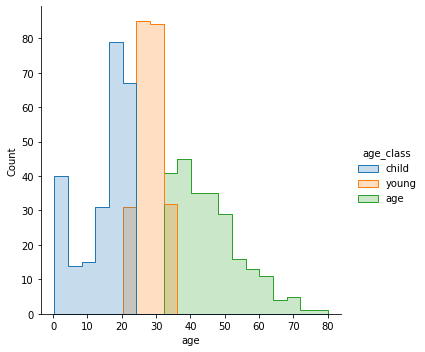

In [12]:
sns.displot(titanic, x='age', hue='age_class',element='step')

In [13]:
titanic['age_class'].value_counts()

child    246
age      236
young    232
Name: age_class, dtype: int64

In [14]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone', 'age_class'],
      dtype='object')

In [15]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,young
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,young
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,young


In [25]:
def surv_ratio(s):
    return s.sum() / s.count()

In [24]:
titanic.groupby(["sex","age_class"])[['survived']].agg("count")

survived
sex    age_class          
female child           101
       young            79
       age              81
male   child           145
       young           153
       age             155

In [26]:
# 데이터, 행 데이터, 열 데이터 aggfunc, margins, margins_name, fill_value
titanic.pivot_table("survived", ['sex','age_class'],'pclass',aggfunc=surv_ratio)

pclass                   1         2         3
sex    age_class                              
female child      0.954545  1.000000  0.508475
       young      0.947368  0.909091  0.481481
       age        0.977273  0.857143  0.250000
male   child      0.500000  0.357143  0.158879
       young      0.500000  0.076923  0.195652
       age        0.347826  0.062500  0.055556